In [1]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
import DNSmodule as dns

params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.style.use('ggplot')

# Have to compare magnetic and kinetic decay for several cases in the same plot. Schekochichin mentions that studies found that magnetic decay is always shallower than kinetic M ~ t**-4/7 < t**-2/3 and  K ~ t**-5/7> t**-2/3

In [2]:
def Lkol(eps,visc):
    return np.power((visc**3)/(eps),1/4)

Pm = 2
visc = 0.008
N = 256
kmax = int(N/3)-1
print('k_max = ',kmax)
print('Pm = ',Pm)
print('$visc = $', visc)
eta = visc/Pm
Lkol(0.1,eta) * kmax

k_max =  84
Pm =  2
$visc = $ 0.008


2.3758787847867997

In [3]:
def resolution_check(f_NH):
    

    ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
    idx_sort = np.argsort(Pms)
    ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
    colors = sns.color_palette('hls',len(f_NH))
    for id_f, f in enumerate(f_NH):
        lu = lus[id_f]
        lb = lbs[id_f]
        Pm = Pms[id_f]
        N = Ns[id_f]
        visc = viscs[id_f]
        kmax = ks[id_f].max()
        time = times[id_f]
        plt.plot(time,kmax*lu,c=colors[id_f],lw=2,label='{} {} {}'.format(N,visc,Pm))
        plt.plot(time,kmax*lb,c=colors[id_f])
        if (True in (kmax * lu < 1.25 )) or (True in (kmax * lb < 1.25 )):
            print(f)
        
    plt.legend()
    plt.xlim(0.1,5  )
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(0.5,4)
    plt.show()

NH_v0.005/nhg.b_1024_0.005_16.spc
NH_v0.005/nhh.b_2048_0.005_32.spc


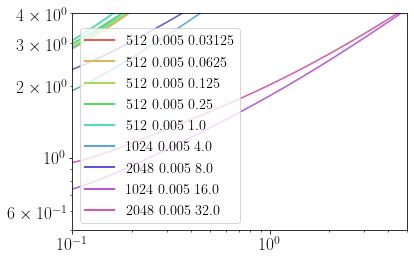

In [4]:
f_NH = glob('NH_v0.005/*.b*.spc')
resolution_check(f_NH)

# varying Pm, fixed viscosity = 0.005

nonhelical
Pm = 0.03125 	 p = 2.81 	 q = 0.42
Pm = 0.0625 	 p = 2.79 	 q = 0.51
Pm = 0.125 	 p = 2.74 	 q = 0.52
Pm = 0.25 	 p = 2.59 	 q = 0.47
Pm = 1.0 	 p = 2.24 	 q = 0.45
Pm = 4.0 	 p = 1.78 	 q = 0.40
Pm = 8.0 	 p = 1.57 	 q = 0.38
Pm = 16.0 	 p = 1.41 	 q = 0.37
Pm = 32.0 	 p = 1.21 	 q = 0.35
helical
Pm = 0.03125 	 p = 2.81 	 q = 0.41
Pm = 0.0625 	 p = 2.80 	 q = 0.51
Pm = 0.25 	 p = 2.58 	 q = 0.47
Pm = 1.0 	 p = 2.31 	 q = 0.43
Pm = 4.0 	 p = 1.16 	 q = 0.41
Pm = 8.0 	 p = 0.86 	 q = 0.46
Pm = 16.0 	 p = 0.73 	 q = 0.49


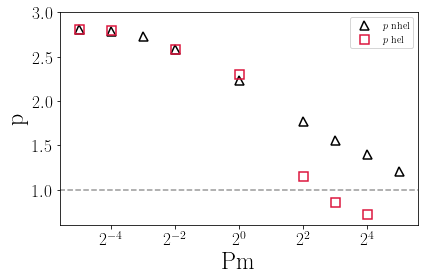

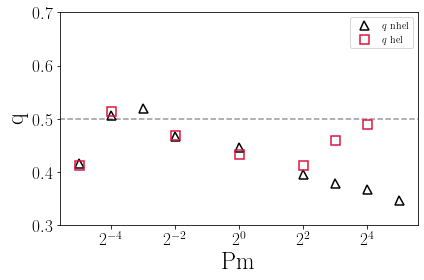

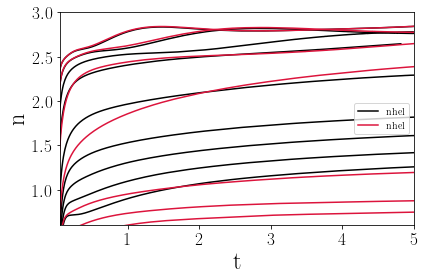

In [5]:
#plt.style.use('ggplot')

figp, axp = plt.subplots()
figq, axq = plt.subplots()
fign, axn = plt.subplots()

ti = 300
tf = -1

f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
pn = []
qn = []
print('nonhelical')
for idx, f in enumerate(f_NH):

    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    nn = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    tag = 'nhel' if idx==0 else '__nolegend__'
    axn.plot(time[1:],nn,color='k',label=tag) 
        
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    pn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qn.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    

pn = np.array(pn)
qn = np.array(qn)

axp.plot(Pms, -pn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'k',label='{:<}    {:>}'.format('$p$', 'nhel'))
axq.plot(Pms, qn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'k',label = '{:<}    {:>}'.format('$q$','nhel'))



f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
ph = []
qh = []
print('helical')
for idx, f in enumerate(f_H):
 
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    nh = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    tag = 'nhel' if idx==0 else '__nolegend__'
    axn.plot(time[1:],nh,color='crimson',label=tag)
    
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    ph.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qh.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    

ph = np.array(ph)
qh = np.array(qh)

axp.plot(Pms, -ph,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label='{:<}    {:>}'.format('$p$', 'hel'))
axq.plot(Pms, qh,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label = '{:<}    {:>}'.format('$q$','hel'))



axp.set_xscale('log',basex=2)
axp.set_ylabel('p',size = 24)
axp.set_xlabel('Pm',size = 24)
axp.legend(fontsize=10)
axp.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axp.set_xlim(1/48,48)
axp.set_ylim(0.6,3)
figp.tight_layout()
#figp.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')

axq.set_xscale('log',basex=2)
axq.set_ylabel('q',size = 24)
axq.set_xlabel('Pm',size = 24)
axq.legend(fontsize=10)
axq.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axq.set_xlim(1/48,48)
axq.set_ylim(0.3,0.7)
figq.tight_layout()


#axn.set_xscale('',basex=2)
axn.set_ylabel('n',size = 24)
axn.set_xlabel('t',size = 24)
axn.legend(fontsize=10)
#axn.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axn.set_xlim(5e-2,5)
axn.set_ylim(0.6,3)
fign.tight_layout()


#figp.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()

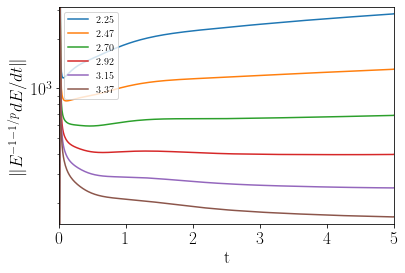

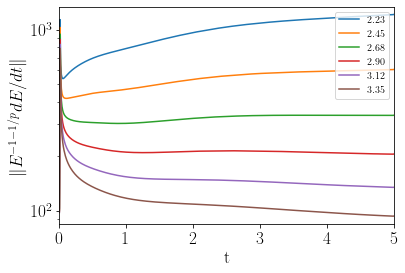

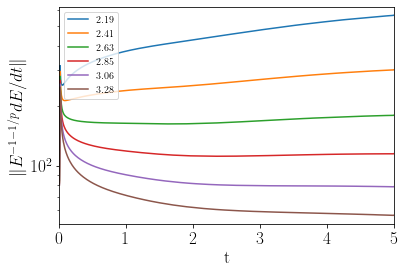

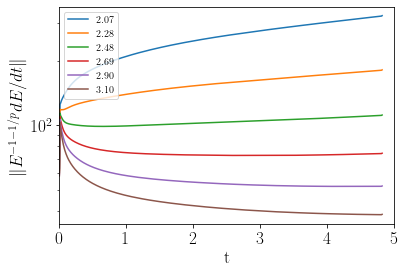

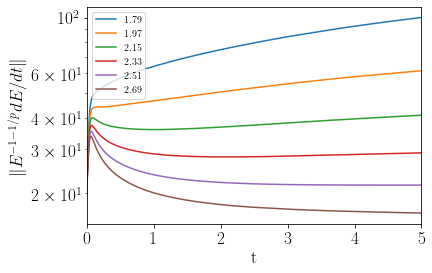

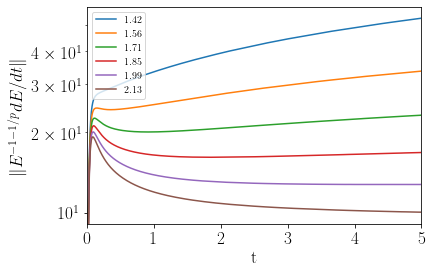

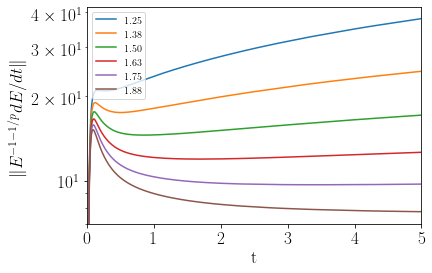

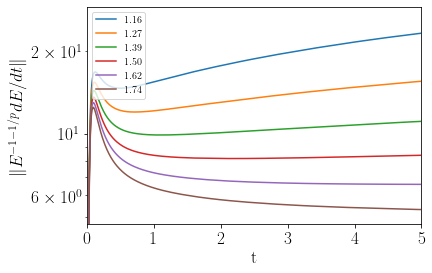

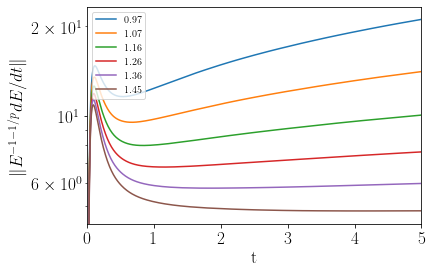

In [2]:

f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)

for idx, f in enumerate(f_NH):
    
    time = times[idx]
    B = Bs[idx]
    
    dns.p(time,B)

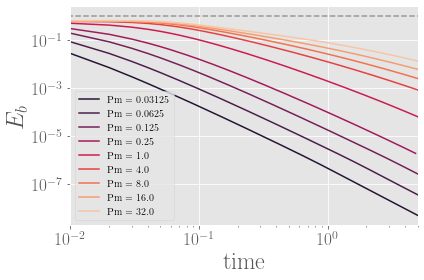

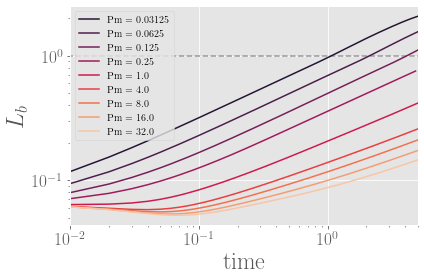

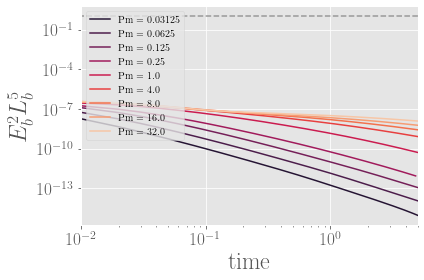

In [4]:
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)

plt.style.use('ggplot')

figE, axE = plt.subplots()
figL, axL = plt.subplots()
figH, axH = plt.subplots()
col_NH = sns.color_palette('rocket',len(f_NH))

for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    axE.plot(time, B, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axL.plot(time,Lb, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axH.plot(time,np.power(B,2)*np.power(Lb,5), color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}$',size = 24)
axE.set_xlabel('time',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-2,5)


axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
axL.legend(fontsize=10)
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL.set_xlim(1e-2,5)


axH.set_xscale('log')
axH.set_yscale('log')
axH.set_ylabel('$E_b^2 L^5_{b}$',size = 24)
axH.set_xlabel('time',size = 24)
axH.legend(fontsize=10)
axH.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axH.set_xlim(1e-2,5)

figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
figH.tight_layout()

plt.show()

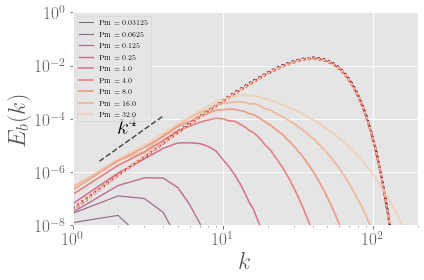

In [83]:

lws = np.linspace(1,2,len(f_NH))
plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,481]


for idx, f in enumerate(f_NH):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]


    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=col_NH[idx],lw=2,ls=':',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=col_NH[idx],alpha = 0.6,lw = lws[idx],label = 'Pm = {}'.format(Pm))

k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-5,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,1)
ax.set_xlim(1,200)
ax.legend(fontsize=7)
fig.tight_layout()
fig.savefig('Eb_k_vs_Pm.pdf',format='pdf')

In [116]:
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)



figE, axE = plt.subplots()
figL, axL = plt.subplots()

col_NH = sns.color_palette('rocket',len(f_NH))

for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    E = Es[id_f]
    Lb   = Lbs[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    axE.plot(time,B/E, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axL.plot(time,Lb/lb, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=10)
axL.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

array(['NH_v0.005/nha.b_512_0.005_0.03125.spc',
       'NH_v0.005/nhb.b_512_0.005_0.0625.spc',
       'NH_v0.005/nhbb.b_512_0.005_0.125.spc',
       'NH_v0.005/nhc.b_512_0.005_0.25.spc',
       'NH_v0.005/nhd.b_512_0.005_1.spc',
       'NH_v0.005/nhe.b_1024_0.005_4.spc',
       'NH_v0.005/nhf.b_2048_0.005_8.spc',
       'NH_v0.005/nhg.b_1024_0.005_16.spc',
       'NH_v0.005/nhh.b_2048_0.005_32.spc'], dtype='<U37')

In [89]:
lis = ['a','b','c']

[1.  1.2 1.4 1.6 1.8 2. ]
NH_v0.005/nhb.b_512_0.005_0.0625.spc
NH_v0.005/nhd.b_512_0.005_1.spc
NH_v0.005/nhf.b_2048_0.005_8.spc
NH_v0.005/nhh.b_2048_0.005_32.spc


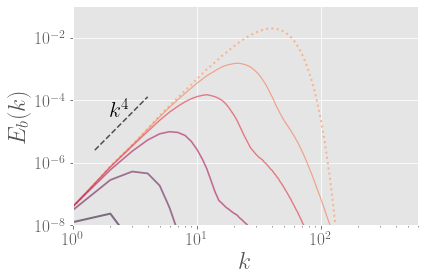

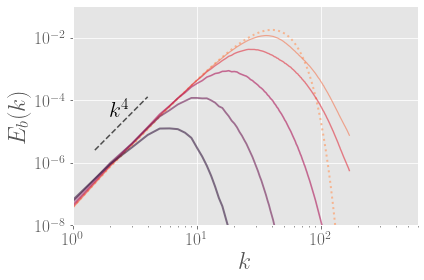

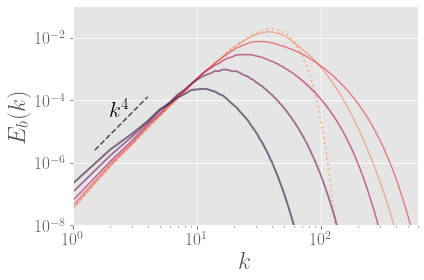

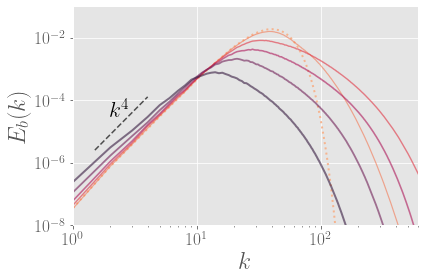

In [103]:
Pmss = ['_0.0625.','_1.','_8.','_32.']
t = [0,2,8,32,128,481]
lws = np.linspace(1,2,len(t))
print(lws)
plt.style.use('ggplot')

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []

for idx, f in enumerate(f_NH):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
            Bk = Bks[idx]
            Pm = Pms[idx]
            T = Tus[idx][0]
            t_T.append(t/T)
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]


            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=2,ls=':',label ='__nolegend__')
                else:
                    ax.plot(k,Bk[idx_t],c=col_NH[id_t],alpha = 0.6, lw = lws[id_t])
            k_slope = np.array([1.5,4])
            ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
            ax.text(2,3e-5,'$k^{4}$',size=22)
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_ylabel('$E_b(k)$',fontsize=24)
            ax.set_xlabel('$k$',fontsize=24)
            ax.set_ylim(1e-8,1e-1)
            ax.set_xlim(1,600)
            #ax.legend(fontsize=7)
            fig.tight_layout()
            fig.savefig('Eb_k_{}.pdf'.format(Pm),format='pdf')


In [109]:
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
f_H

array(['H_v0.005/ha.b_512_0.005_0.03125.spc',
       'H_v0.005/hb.b_512_0.005_0.0625.spc',
       'H_v0.005/hc.b_512_0.005_0.25.spc',
       'H_v0.005/hd.b_512_0.005_1.spc', 'H_v0.005/he.b_1024_0.005_4.spc',
       'H_v0.005/hf.b_2048_0.005_8.spc',
       'H_v0.005/hg.b_1024_0.005_16.spc'], dtype='<U35')

[1.  1.2 1.4 1.6 1.8 2. ]
H_v0.005/hb.b_512_0.005_0.0625.spc
H_v0.005/hd.b_512_0.005_1.spc
H_v0.005/he.b_1024_0.005_4.spc
H_v0.005/hg.b_1024_0.005_16.spc


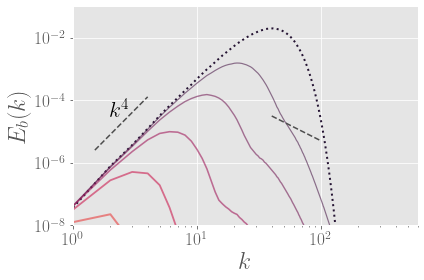

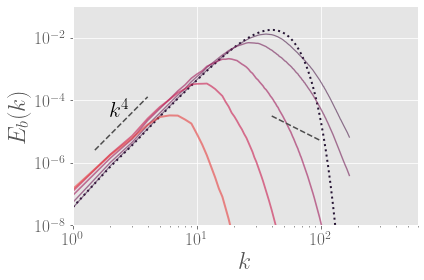

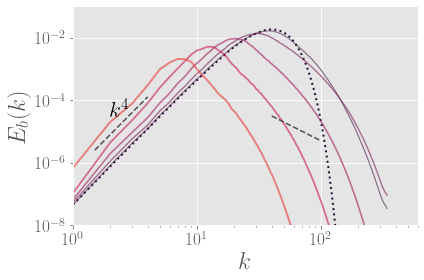

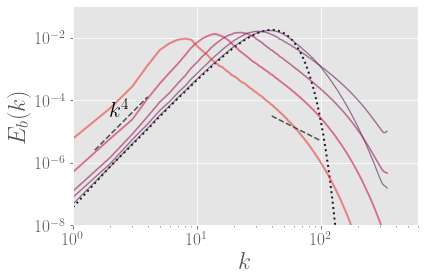

In [115]:
f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)


Pmss = ['_0.0625.','_1.','_4.','_16.']
t = [0,2,8,32,128,481]
lws = np.linspace(1,2,len(t))
print(lws)
plt.style.use('ggplot')

col_H = sns.color_palette('rocket',len(t))
col_H.reverse()
t_T = []

for idx, f in enumerate(f_H):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
            Bk = Bks[idx]
            Pm = Pms[idx]
            T = Tus[idx][0]
            t_T.append(t/T)
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]


            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=2,ls=':',label ='__nolegend__')
                else:
                    ax.plot(k,Bk[idx_t],c=col_NH[id_t],alpha = 0.6, lw = lws[id_t])
            k_slope = np.array([1.5,4])
            ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
            
            ax.text(2,3e-5,'$k^{4}$',size=22)
            k_slope = np.array([40.0,100.0])
            ax.plot(k_slope,5e-2*np.power(k_slope,-2),c='0.3',ls='--')
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_ylabel('$E_b(k)$',fontsize=24)
            ax.set_xlabel('$k$',fontsize=24)
            ax.set_ylim(1e-8,1e-1)
            ax.set_xlim(1,600)
            #ax.legend(fontsize=7)
            fig.tight_layout()
            #fig.savefig('Eb_k_{}_hel.pdf'.format(Pm),format='pdf')


To = 0.10
To = 0.10
To = 0.10
To = 0.10
To = 0.10
To = 0.10
To = 0.10


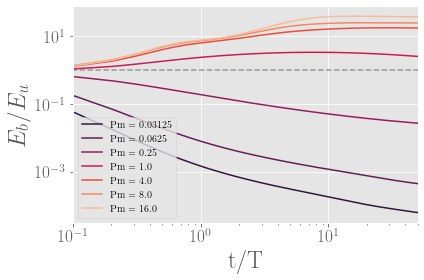

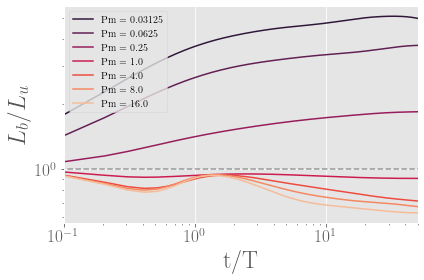

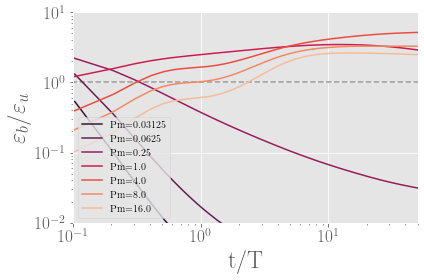

In [113]:
f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)

plt.style.use('ggplot')

figE, axE = plt.subplots()
figL, axL = plt.subplots()
figeps,axeps = plt.subplots()
col_H = sns.color_palette('rocket',len(f_H))

for id_f,f in enumerate(f_H):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    
    axE.plot(time/T[0], B/E, color=col_H[id_f], label = 'Pm = {}'.format(Pm))
    axL.plot(time/T[0],Lb/Lu, color=col_H[id_f], label = 'Pm = {}'.format(Pm))
    axeps.plot(time/T[0],epsb/epsu,color=col_H[id_f],label='Pm={}'.format(Pm))
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}/E_u$',size = 24)
axE.set_xlabel('t/T',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-1,50)

axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}/L_u$',size = 24)
axL.set_xlabel('t/T',size = 24)
axL.legend(fontsize=10)
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL.set_xlim(1e-1,50)

axeps.set_xscale('log')
axeps.set_yscale('log')
axeps.set_ylabel('$\\varepsilon_{b}/\\varepsilon_u$',size = 24)
axeps.set_xlabel('t/T',size = 24)
axeps.legend(fontsize=10)
axeps.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axeps.set_xlim(1e-1,50)
axeps.set_ylim(1e-2,1e1)

figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
figeps.tight_layout()
plt.show()

To = 0.10
To = 0.10
To = 0.10
To = 0.10
To = 0.10
To = 0.10
To = 0.10
To = 0.10
To = 0.10


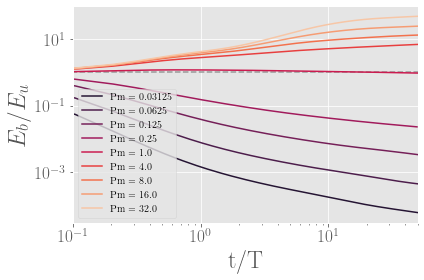

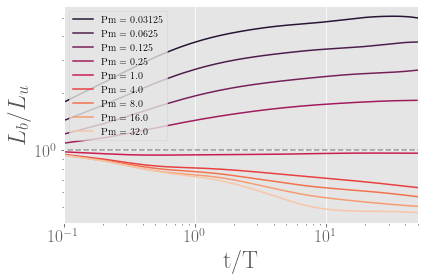

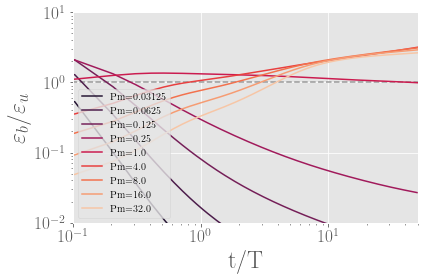

In [107]:
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)

plt.style.use('ggplot')

figE, axE = plt.subplots()
figL, axL = plt.subplots()
figeps,axeps = plt.subplots()
col_NH = sns.color_palette('rocket',len(f_NH))

for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    
    axE.plot(time/T[0], B/E, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axL.plot(time/T[0],Lb/Lu, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axeps.plot(time/T[0],epsb/epsu,color=col_NH[id_f],label='Pm={}'.format(Pm))
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}/E_u$',size = 24)
axE.set_xlabel('t/T',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-1,50)

axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}/L_u$',size = 24)
axL.set_xlabel('t/T',size = 24)
axL.legend(fontsize=10)
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL.set_xlim(1e-1,50)

axeps.set_xscale('log')
axeps.set_yscale('log')
axeps.set_ylabel('$\\varepsilon_{b}/\\varepsilon_u$',size = 24)
axeps.set_xlabel('t/T',size = 24)
axeps.legend(fontsize=10)
axeps.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axeps.set_xlim(1e-1,50)
axeps.set_ylim(1e-2,1e1)

figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
figeps.tight_layout()
plt.show()

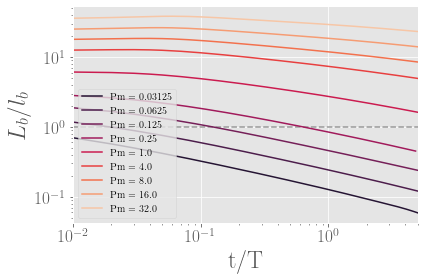

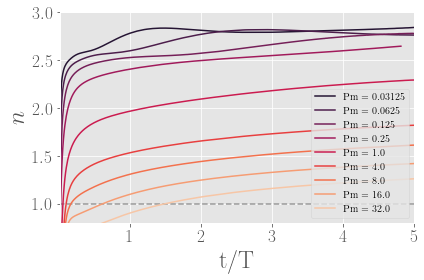

In [108]:
# n over time
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)

plt.style.use('ggplot')

figE, axE = plt.subplots()
fign, axn = plt.subplots()

col_NH = sns.color_palette('rocket',len(f_NH))

for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    n = -np.gradient(np.log(B[1:]),np.log(time[1:]))
    axE.plot(time, Lb/lb, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axn.plot(time[1:],n, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$L_{b}/l_b$',size = 24)
axE.set_xlabel('t/T',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-2,5)

#axn.set_xscale('log')
#axn.set_yscale('log')
axn.set_ylabel('$n$',size = 24)
axn.set_xlabel('t/T',size = 24)
axn.legend(fontsize=10)
axn.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axn.set_xlim(1e-2,5)
axn.set_ylim(0.8,3)

figE.tight_layout()
#figE.savefig('Eb_vs_t_DNS.pdf',format='pdf')
fign.tight_layout()
#fign.savefig('Lb_vs_t_DNS.pdf',format='pdf')

plt.show()

/home/andres/miniconda3/envs/std/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


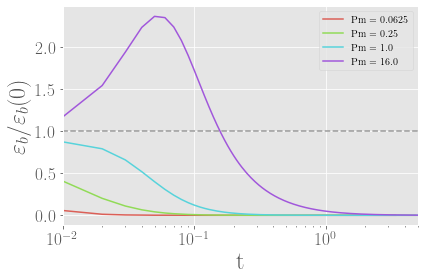

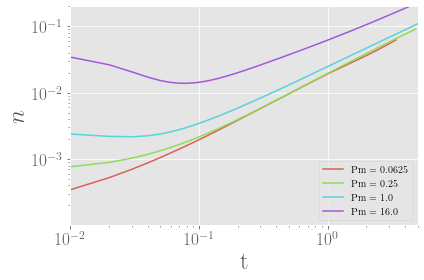

In [58]:
# n over time
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)

plt.style.use('ggplot')

figE, axE = plt.subplots()
fign, axn = plt.subplots()

col_NH = sns.color_palette('hls',len(f_NH))

for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    visc = viscs[id_f]
    T = Tus[id_f]
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    n = -np.gradient(np.log(B[1:]),np.log(time[1:]))
    axE.plot(time, epsb/epsb[0], color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axn.plot(time,15*2*B*visc/(epsb*3), color=col_NH[id_f], label = 'Pm = {}'.format(Pm))

axE.set_xscale('log')
#axE.set_yscale('log')
axE.set_ylabel('$\\varepsilon_b/\\varepsilon_b(0)$',size = 24)
axE.set_xlabel('t',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-2,5)

axn.set_xscale('log')
axn.set_yscale('log')
axn.set_ylabel('$n$',size = 24)
axn.set_xlabel('t',size = 24)
axn.legend(fontsize=10)
axn.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axn.set_xlim(1e-2,5)
axn.set_ylim(0,0.2)

figE.tight_layout()
#figE.savefig('Eb_vs_t_DNS.pdf',format='pdf')
fign.tight_layout()
#fign.savefig('Lb_vs_t_DNS.pdf',format='pdf')

plt.show()

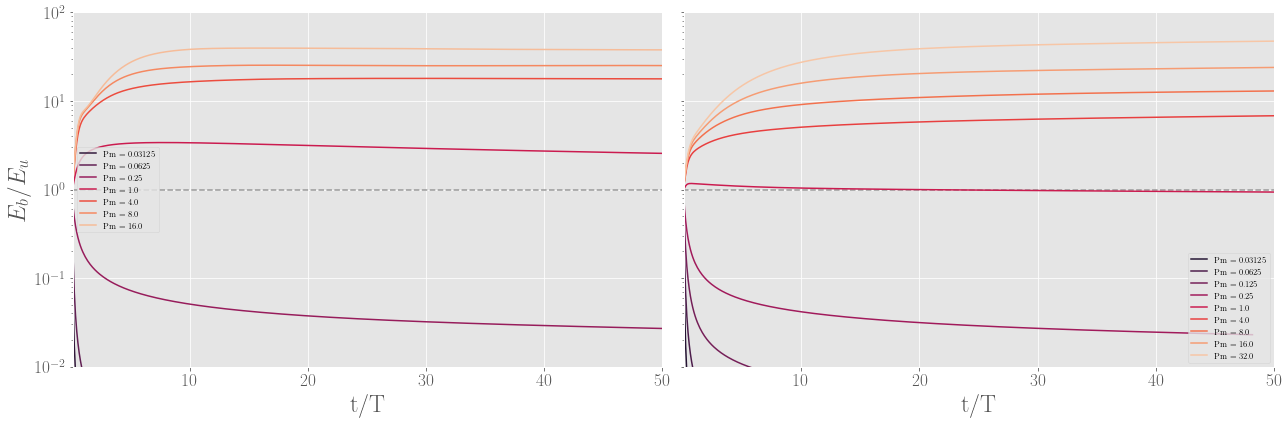

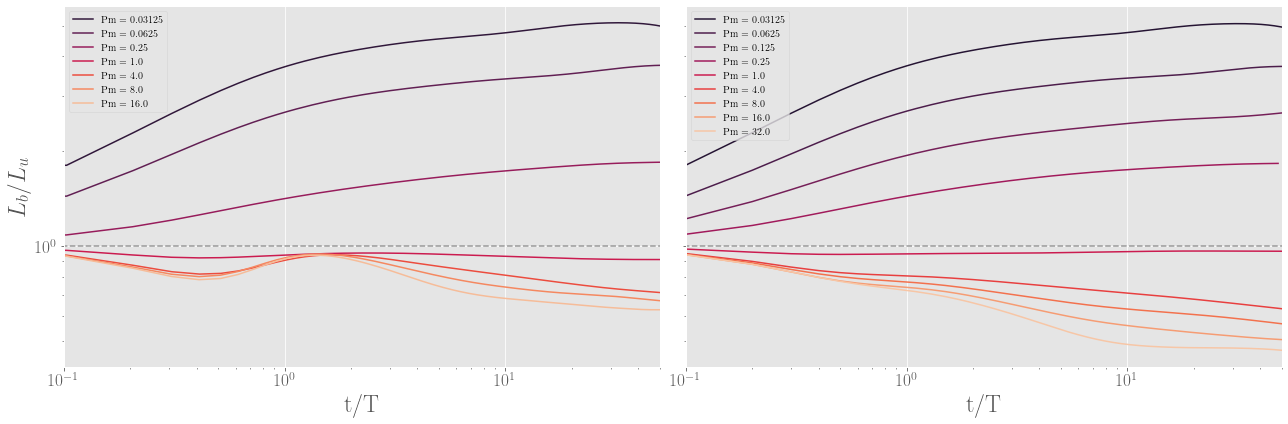

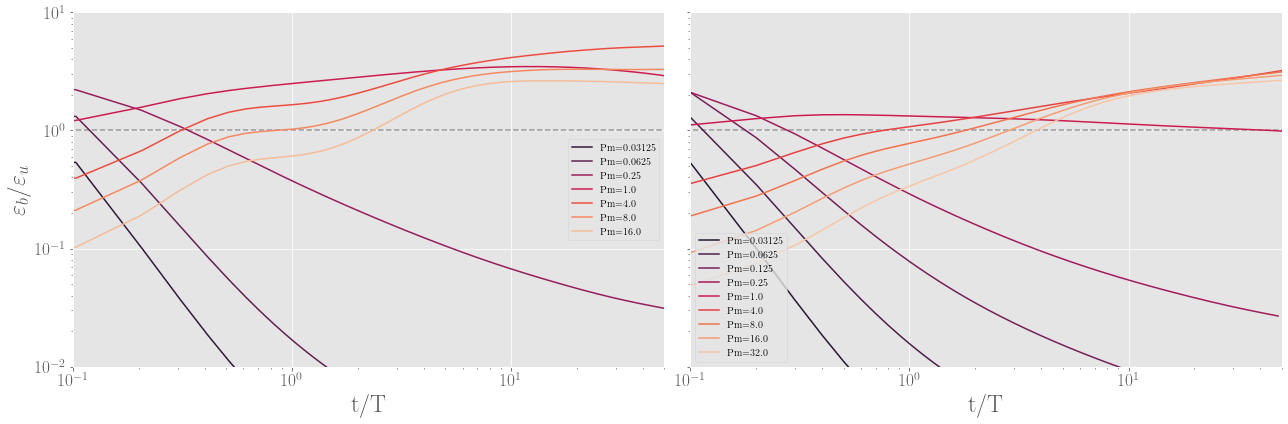

In [126]:

plt.style.use('ggplot')

figE, [axEh,axEnh] = plt.subplots(1,2,sharex=True,sharey=True,figsize=(18,6))
figL, [axLh,axLnh] = plt.subplots(1,2,sharex=True,sharey=True,figsize=(18,6))
figeps,[axepsh,axepsnh] = plt.subplots(1,2,sharex=True,sharey=True,figsize=(18,6))
col_H = sns.color_palette('rocket',len(f_H))


f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)

for id_f,f in enumerate(f_H):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    #print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    
    axEh.plot(time/T[0], B/E, color=col_H[id_f], label = 'Pm = {}'.format(Pm))
    axLh.plot(time/T[0],Lb/Lu, color=col_H[id_f], label = 'Pm = {}'.format(Pm))
    axepsh.plot(time/T[0],epsb/epsu,color=col_H[id_f],label='Pm={}'.format(Pm))

f_HN = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
col_NH = sns.color_palette('rocket',len(f_NH))
for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    #print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    
    axEnh.plot(time/0.1, B/E, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axLnh.plot(time/0.1,Lb/Lu, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axepsnh.plot(time/0.1,epsb/epsu,color=col_NH[id_f],label='Pm={}'.format(Pm))

#axEh.set_xscale('log')
axEh.set_yscale('log')
axEh.set_ylabel('$E_{b}/E_u$',size = 24)
axEh.set_xlabel('t/T',size = 24)
axEh.legend(fontsize=8)
axEh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
#axEh.set_xlim(1e-1,50)
axEh.set_ylim(1e-2,1e2)


axLh.set_xscale('log')
axLh.set_yscale('log')
axLh.set_ylabel('$L_{b}/L_u$',size = 24)
axLh.set_xlabel('t/T',size = 24)
axLh.legend(fontsize=10)
axLh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
#axLh.set_xlim(1e-1,50)

axepsh.set_xscale('log')
axepsh.set_yscale('log')
axepsh.set_ylabel('$\\varepsilon_{b}/\\varepsilon_u$',size = 24)
axepsh.set_xlabel('t/T',size = 24)
axepsh.legend(fontsize=10)
axepsh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
#axepsh.set_xlim(1e-1,50)
#axepsh.set_ylim(1e-2,1e1)


#axEnh.set_xscale('log')
axEnh.set_yscale('log')
#axEnh.set_ylabel('$E_{b}/E_u$',size = 24)
axEnh.set_xlabel('t/T',size = 24)
axEnh.legend(fontsize=8)
axEnh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axEnh.set_xlim(1e-1,50)

axLnh.set_xscale('log')
axLnh.set_yscale('log')
#axLnh.set_ylabel('$L_{b}/L_u$',size = 24)
axLnh.set_xlabel('t/T',size = 24)
axLnh.legend(fontsize=10)
axLnh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axLnh.set_xlim(1e-1,50)

axepsnh.set_xscale('log')
axepsnh.set_yscale('log')
#axepsnh.set_ylabel('$\\varepsilon_{b}/\\varepsilon_u$',size = 24)
axepsnh.set_xlabel('t/T',size = 24)
axepsnh.legend(fontsize=10)
axepsnh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axepsnh.set_xlim(1e-1,50)
axepsnh.set_ylim(1e-2,1e1)

figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
figeps.tight_layout()
plt.show()

In [ ]:
COMPARE TAYLOR U Y TAYLOR B

nonhelical
Pm = 1 	 p = 1.39 	 q = 0.41
helical
Pm = 1 	 p = 0.69 	 q = 0.53


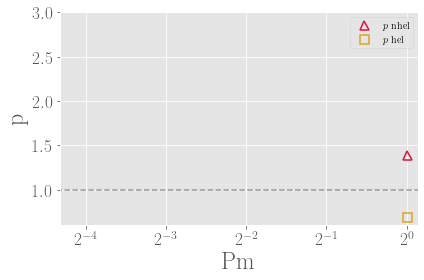

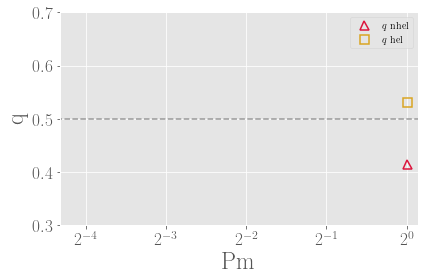

In [37]:
plt.style.use('ggplot')

figp, axp = plt.subplots()
figq, axq = plt.subplots()

ti = 300
tf = -1

f_NH = glob('NH_v0.0003125/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
pn = []
qn = []
print('nonhelical')
for idx, f in enumerate(f_NH):

    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    pn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qn.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    

pn = np.array(pn)
qn = np.array(qn)

axp.plot(Pms, -pn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label='{:<}    {:>}'.format('$p$', 'nhel'))
axq.plot(Pms, qn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'crimson',label = '{:<}    {:>}'.format('$q$','nhel'))



f_H = glob('H_v0.0003125/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
ph = []
qh = []
print('helical')
for idx, f in enumerate(f_H):
 
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    ph.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qh.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    

ph = np.array(ph)
qh = np.array(qh)

axp.plot(Pms, -ph,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label='{:<}    {:>}'.format('$p$', 'hel'))
axq.plot(Pms, qh,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label = '{:<}    {:>}'.format('$q$','hel'))



axp.set_xscale('log',basex=2)
axp.set_ylabel('p',size = 24)
axp.set_xlabel('Pm',size = 24)
axp.legend(fontsize=10)
axp.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axp.set_xlim(5e-2,1.1)
axp.set_ylim(0.6,3)
figp.tight_layout()
#figp.savefig('p_scalings_v0.0003125.pdf',format='pdf')

axq.set_xscale('log',basex=2)
axq.set_ylabel('q',size = 24)
axq.set_xlabel('Pm',size = 24)
axq.legend(fontsize=10)
axq.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axq.set_xlim(5e-2,1.1)
axq.set_ylim(0.3,0.7)
figq.tight_layout()
#figq.savefig('q_scalings_v0.0003125.pdf',format='pdf')
plt.show()

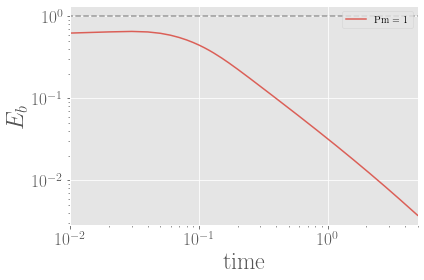

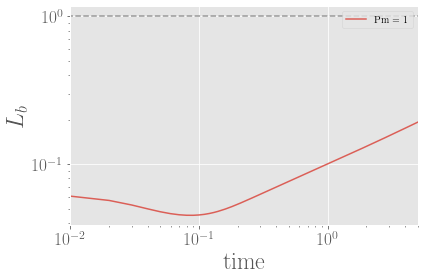

In [38]:

f_NH = glob('NH_v0.0003125/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)

plt.style.use('ggplot')

figE, axE = plt.subplots()
figL, axL = plt.subplots()

col_NH = sns.color_palette('hls',len(f_NH))

for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    axE.plot(time, B, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axL.plot(time,Lb, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=10)
axL.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

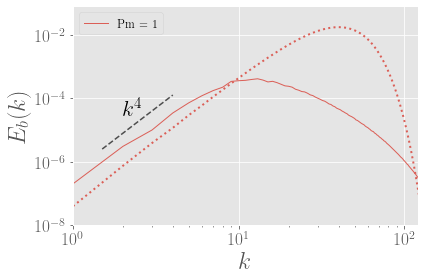

In [39]:
f_NH = glob('NH_v0.0003125/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
lws = np.linspace(1,4,len(f_NH))

plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,302]


for idx, f in enumerate(f_NH):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]


    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=col_NH[idx],lw=2,ls=':',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=col_NH[idx],lw = lws[idx],label = 'Pm = {}'.format(Pm))

k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-5,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,0.8e-1)
ax.set_xlim(1,120)
ax.legend(fontsize=12)
fig.tight_layout()
#fig.savefig('bleh.pdf',format='pdf')

In [13]:
t= np.linspace(0,5,18)

In [14]:
np.array_split(t,10)

[array([0.        , 0.29411765]),
 array([0.58823529, 0.88235294]),
 array([1.17647059, 1.47058824]),
 array([1.76470588, 2.05882353]),
 array([2.35294118, 2.64705882]),
 array([2.94117647, 3.23529412]),
 array([3.52941176, 3.82352941]),
 array([4.11764706, 4.41176471]),
 array([4.70588235]),
 array([5.])]